In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/peptide_files/AllQuantifiedPeptides_PXD021882.tsv', sep='\t')

In [3]:
df.head()

,Sequence,Base Sequence,Protein Groups,Gene Names,Organism,Intensity_Subject1_FACS145_B_C9-calib,Intensity_Subject1_FACS145_B_C13-calib,Intensity_Subject1_FACS145_B_C12-calib,Intensity_Subject1_FACS145_B_C11-calib,Intensity_Subject1_FACS145_B_C10-calib,...,Detection Type_Subject1_FACS145_B_C13-calib,Detection Type_Subject1_FACS145_B_C12-calib,Detection Type_Subject1_FACS145_B_C11-calib,Detection Type_Subject1_FACS145_B_C10-calib,Detection Type_Subject1_FACS145_T_D9-calib,Detection Type_Subject1_FACS145_T_D13-calib,Detection Type_Subject1_FACS145_T_D12-calib,Detection Type_Subject1_FACS145_T_D11-calib,Detection Type_Subject1_FACS145_T_D10-calib,Unnamed: 25
0,AAAAAAALESWQAAAPRK,AAAAAAALESWQAAAPRK,Q9UH36,SRRD,Homo sapiens,0.000000,0.000000,0.000000,0.000000,0.000000,...,NotDetected,NotDetected,NotDetected,NotDetected,MSMSIdentifiedButNotQuantified,NotDetected,NotDetected,NotDetected,NotDetected,NaN
1,AAAAAAALQAK,AAAAAAALQAK,P36578,RPL4,Homo sapiens,124295.636719,171100.643977,134282.716056,149487.604578,181559.653506,...,MSMS,MSMS,MSMS,MSMS,MSMS,MSMS,MSMS,MSMS,MSMS,NaN
2,AAAAAATAAAAASIRERQTVALK,AAAAAATAAAAASIRERQTVALK,Q8WVM8,SCFD1,Homo sapiens,24729.603854,143062.893144,0.000000,67739.735056,34991.770899,...,MBR,NotDetected,MBR,MSMS,NotDetected,MBR,NotDetected,NotDetected,MBR,NaN
3,AAADLMAYC[Common Fixed:Carbamidomethyl on C]EAHAK,AAADLMAYCEAHAK,P59768;UNDEFINED,GNG2;,Homo sapiens;,9382.318691,0.000000,0.000000,0.000000,12728.241993,...,NotDetected,NotDetected,NotDetected,MBR,MBR,NotDetected,MSMSIdentifiedButNotQuantified,MSMS,NotDetected,NaN
4,AAAEVNQDYGLDPK,AAAEVNQDYGLDPK,P07954,FH,Homo sapiens,0.000000,0.000000,0.000000,0.000000,0.000000,...,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,MSMS,NaN


In [4]:
# we need to get the PGM1 protein and see if it's kind of looking the same. 

In [5]:
df_peptide_notshared = df[~df['Protein Groups'].str.contains(';')]
df_peptide_notshared 

df_peptide_shared = df[df['Protein Groups'].str.contains(';')]
df_peptide_shared

df_peptide_shared['gene_split'] = df_peptide_shared['Gene Names'].str.split(';')
# df_peptide_shared[['Gene Names', 'gene_split']]

#expand the rows. the concat onto other df
df2_pep_shared = df_peptide_shared.explode('gene_split').reset_index(drop=True)
df2_pep_shared['Gene Names'] = df2_pep_shared['Gene Names'].str.split(';').str[0]
df2_pep_shared = df2_pep_shared[df2_pep_shared['gene_split'] != ""] #without this line protein that have the format AAX; are added twice

df_combined = pd.concat([df_peptide_notshared, df2_pep_shared])
df_combined

/var/folders/zk/jc657sbs27l7_q82ygdlvxxc0000gp/T/ipykernel_39329/226859099.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peptide_shared['gene_split'] = df_peptide_shared['Gene Names'].str.split(';')


,Sequence,Base Sequence,Protein Groups,Gene Names,Organism,Intensity_Subject1_FACS145_B_C9-calib,Intensity_Subject1_FACS145_B_C13-calib,Intensity_Subject1_FACS145_B_C12-calib,Intensity_Subject1_FACS145_B_C11-calib,Intensity_Subject1_FACS145_B_C10-calib,...,Detection Type_Subject1_FACS145_B_C12-calib,Detection Type_Subject1_FACS145_B_C11-calib,Detection Type_Subject1_FACS145_B_C10-calib,Detection Type_Subject1_FACS145_T_D9-calib,Detection Type_Subject1_FACS145_T_D13-calib,Detection Type_Subject1_FACS145_T_D12-calib,Detection Type_Subject1_FACS145_T_D11-calib,Detection Type_Subject1_FACS145_T_D10-calib,Unnamed: 25,gene_split
0,AAAAAAALESWQAAAPRK,AAAAAAALESWQAAAPRK,Q9UH36,SRRD,Homo sapiens,0.000000,0.000000,0.000000,0.000000,0.000000,...,NotDetected,NotDetected,NotDetected,MSMSIdentifiedButNotQuantified,NotDetected,NotDetected,NotDetected,NotDetected,NaN,NaN
1,AAAAAAALQAK,AAAAAAALQAK,P36578,RPL4,Homo sapiens,124295.636719,171100.643977,134282.716056,149487.604578,181559.653506,...,MSMS,MSMS,MSMS,MSMS,MSMS,MSMS,MSMS,MSMS,NaN,NaN
2,AAAAAATAAAAASIRERQTVALK,AAAAAATAAAAASIRERQTVALK,Q8WVM8,SCFD1,Homo sapiens,24729.603854,143062.893144,0.000000,67739.735056,34991.770899,...,NotDetected,MBR,MSMS,NotDetected,MBR,NotDetected,NotDetected,MBR,NaN,NaN
4,AAAEVNQDYGLDPK,AAAEVNQDYGLDPK,P07954,FH,Homo sapiens,0.000000,0.000000,0.000000,0.000000,0.000000,...,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,MSMS,NaN,NaN
5,AAAFEEQENETVVVKEK,AAAFEEQENETVVVKEK,Q9Y490,TLN1,Homo sapiens,64328.264974,70361.300867,64301.337511,46787.919980,75571.161242,...,MSMS,MSMS,MSMS,MSMS,MSMS,MSMS,MSMS,MSMS,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5132,YVLENHPGTNSNYQMHLLKK,YVLENHPGTNSNYQMHLLKK,Q5SSJ5;UNDEFINED,HP1BP3,Homo sapiens;,16489.262098,0.000000,20540.137468,36647.197774,23167.924760,...,MSMS,MBR,MBR,MBR,MBR,MBR,MSMS,MSMS,NaN,HP1BP3
5134,YVSQYYPK,YVSQYYPK,Q5SSJ5;UNDEFINED,HP1BP3,Homo sapiens;,42537.434945,36212.976263,32795.840323,47356.574413,27298.274311,...,MSMS,MSMS,MSMS,MSMS,MSMS,MSMS,MSMS,MBR,NaN,HP1BP3
5136,YYGGGSEGGRAPK,YYGGGSEGGRAPK,P14866;UNDEFINED,HNRNPL,Homo sapiens;,54305.541667,64208.258722,37771.365344,77323.525580,98773.761959,...,MSMS,MSMS,MSMS,MSMS,MSMS,MSMS,MSMS,MSMS,NaN,HNRNPL
5138,YYVTIIDAPGHR,YYVTIIDAPGHR,P68104|Q5VTE0;UNDEFINED,EEF1A1|EEF1A1P5,Homo sapiens;,0.000000,106794.646292,107427.421407,140961.436297,126813.168510,...,MSMS,MSMS,MBR,MBR,MSMS,MBR,MSMS,MBR,NaN,EEF1A1|EEF1A1P5


In [6]:
df_combined.columns

Index(['Sequence', 'Base Sequence', 'Protein Groups', 'Gene Names', 'Organism',
       'Intensity_Subject1_FACS145_B_C9-calib',
       'Intensity_Subject1_FACS145_B_C13-calib',
       'Intensity_Subject1_FACS145_B_C12-calib',
       'Intensity_Subject1_FACS145_B_C11-calib',
       'Intensity_Subject1_FACS145_B_C10-calib',
       'Intensity_Subject1_FACS145_T_D9-calib',
       'Intensity_Subject1_FACS145_T_D13-calib',
       'Intensity_Subject1_FACS145_T_D12-calib',
       'Intensity_Subject1_FACS145_T_D11-calib',
       'Intensity_Subject1_FACS145_T_D10-calib',
       'Detection Type_Subject1_FACS145_B_C9-calib',
       'Detection Type_Subject1_FACS145_B_C13-calib',
       'Detection Type_Subject1_FACS145_B_C12-calib',
       'Detection Type_Subject1_FACS145_B_C11-calib',
       'Detection Type_Subject1_FACS145_B_C10-calib',
       'Detection Type_Subject1_FACS145_T_D9-calib',
       'Detection Type_Subject1_FACS145_T_D13-calib',
       'Detection Type_Subject1_FACS145_T_D12-calib',
  

In [7]:
#how many proteins are there total?
df_combined = df_combined[['Gene Names','Sequence',
       'Intensity_Subject1_FACS145_B_C9-calib',
       'Intensity_Subject1_FACS145_B_C13-calib',
       'Intensity_Subject1_FACS145_B_C12-calib',
       'Intensity_Subject1_FACS145_B_C11-calib',
       'Intensity_Subject1_FACS145_B_C10-calib'
   ]]


In [8]:
#Calculates the total spectral count for each row. Will help to find examples
def calc_totals(row):
    total = 0
    if row[2] != 0:
        total += 1
    if row[3] != 0:
        total += 1
    if row[4] != 0:
        total += 1
    if row[5] != 0:
        total += 1
    if row[6] != 0:
        total += 1

    return total


df_with_totals = df_combined.copy()
df_with_totals['Total_Count'] = df_with_totals.apply(calc_totals, axis = 1)
df_with_totals = df_with_totals[~df_with_totals['Gene Names'].isnull()]


In [9]:
df_with_totals

,Gene Names,Sequence,Intensity_Subject1_FACS145_B_C9-calib,Intensity_Subject1_FACS145_B_C13-calib,Intensity_Subject1_FACS145_B_C12-calib,Intensity_Subject1_FACS145_B_C11-calib,Intensity_Subject1_FACS145_B_C10-calib,Total_Count
0,SRRD,AAAAAAALESWQAAAPRK,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,RPL4,AAAAAAALQAK,124295.636719,171100.643977,134282.716056,149487.604578,181559.653506,5
2,SCFD1,AAAAAATAAAAASIRERQTVALK,24729.603854,143062.893144,0.000000,67739.735056,34991.770899,4
4,FH,AAAEVNQDYGLDPK,0.000000,0.000000,0.000000,0.000000,0.000000,0
5,TLN1,AAAFEEQENETVVVKEK,64328.264974,70361.300867,64301.337511,46787.919980,75571.161242,5
...,...,...,...,...,...,...,...,...
5132,HP1BP3,YVLENHPGTNSNYQMHLLKK,16489.262098,0.000000,20540.137468,36647.197774,23167.924760,4
5134,HP1BP3,YVSQYYPK,42537.434945,36212.976263,32795.840323,47356.574413,27298.274311,5
5136,HNRNPL,YYGGGSEGGRAPK,54305.541667,64208.258722,37771.365344,77323.525580,98773.761959,5
5138,EEF1A1|EEF1A1P5,YYVTIIDAPGHR,0.000000,106794.646292,107427.421407,140961.436297,126813.168510,4


In [10]:
df_gene_ind = df_with_totals.set_index(['Gene Names', 'Sequence']) #create a multiindex dataframe
df_gene_ind = df_gene_ind[df_gene_ind['Total_Count']>0]#drop rows that don't have any intensities in any col. Who knows why that's a thing
df_gene_ind.sort_index()



Intensity_Subject1_FACS145_B_C9-calib  \
Gene Names Sequence                                                                              
A1BG       C[Common Fixed:Carbamidomethyl on C]LAPLEGAR                           18880.538344   
           LLELTGPK                                                               14579.219601   
           TPGAAANLELIFVGPQHAGNYR                                                 44279.312787   
A2M        AIGYLNTGYQR                                                            13778.278506   
AARS1      AQTAPNKDVQR                                                             6639.547607   
...                                                                                        ...   
ZNF599     SSFIQHNMTHTREK                                                             0.000000   
ZNF648     ALGSLPSGLAHK                                                          254106.703125   
ZNF806     NNILNLQGK                                                              47647.971943   
ZYX        FSPGAPGGSGSQPNQK                                                           0.000000   
           LGHPEALSAGTGSPQPPSFTYAQQR                                                  0.000000   

                                                         Intensity_Subject1_FACS145_B_C13-calib  \
Gene Names Sequence                                                                               
A1BG       C[Common Fixed:Carbamidomethyl on C]LAPLEGAR                                0.000000   
           LLELTGPK                                                                    0.000000   
           TPGAAANLELIFVGPQHAGNYR                                                      0.000000   
A2M        AIGYLNTGYQR                                                                 0.000000   
AARS1      AQTAPNKDVQR                                                                 0.000000   
...                                                                                         ...   
ZNF599     SSFIQHNMTHTREK                                                          18251.924888   
ZNF648     ALGSLPSGLAHK                                                            25052.846668   
ZNF806     NNILNLQGK                                                               60363.701116   
ZYX        FSPGAPGGSGSQPNQK                                                            0.000000   
           LGHPEALSAGTGSPQPPSFTYAQQR                                                   0.000000   

                                                         Intensity_Subject1_FACS145_B_C12-calib  \
Gene Names Sequence                                                                               
A1BG       C[Common Fixed:Carbamidomethyl on C]LAPLEGAR                                0.000000   
           LLELTGPK                                                                    0.000000   
           TPGAAANLELIFVGPQHAGNYR                                                  16861.834443   
A2M        AIGYLNTGYQR                                                              7296.527795   
AARS1      AQTAPNKDVQR                                                                 0.000000   
...                                                                                         ...   
ZNF599     SSFIQHNMTHTREK                                                              0.000000   
ZNF648     ALGSLPSGLAHK                                                            84489.595028   
ZNF806     NNILNLQGK                                                               64701.510911   
ZYX        FSPGAPGGSGSQPNQK                                                            0.000000   
           LGHPEALSAGTGSPQPPSFTYAQQR                                                8855.190767   

                                                         Intensity_Subject1_FACS145_B_C11-calib  \
Gene Names Sequence                                                                               
A1BG    

In [11]:
len(list(df_gene_ind.index.get_level_values('Gene Names').unique()))

1636

In [12]:
len(list(df_gene_ind.index.get_level_values('Sequence')))

11133

In [13]:
no_consistent= []
one_consistent = []
two_consistent = []
three_consistent = []
fourplus_consistent = []

num_proteins = 0

for gene, gene_df in df_gene_ind.groupby(level=0):
    num_proteins+=1
    #loop through each gene and count the number of consistent peptides
    if len(gene_df[gene_df['Total_Count'] == 5]) == 0:
        no_consistent.append(gene)
    elif len(gene_df[gene_df['Total_Count'] == 5]) == 1:
        one_consistent.append(gene)
    elif len(gene_df[gene_df['Total_Count'] == 5]) == 2:
#         import pdb; pdb.set_trace()
        two_consistent.append(gene)
    elif len(gene_df[gene_df['Total_Count'] == 5]) == 3:
        three_consistent.append(gene)
    elif len(gene_df[gene_df['Total_Count'] == 5]) >= 4:
        fourplus_consistent.append(gene)
        
    else:
        print('something is wrong')



In [14]:
len(fourplus_consistent)

329

In [15]:
len(three_consistent)

89

In [16]:
num_proteins

1636

In [17]:
'''
returns a dictionary where the key is the number of peptides, 
and the value is the number of proteins
Example: 5:4 would mean that 4 proteins consist of 5 peptides
'''
def get_num_pep_dict(df_with_totals, pep_consistency_list):
    subdf = df_with_totals[df_with_totals['Gene Names'].isin(pep_consistency_list)]
    subdf = subdf.set_index(['Gene Names', 'Sequence']) #create a multiindex dataframe
    subdf = subdf[subdf['Total_Count']>0]#drop rows that don't have any intensities in any col. Who knows why that's a thing
    subdf = subdf.sort_index()
    
    
    num_pep_consis = {}
    for gene, gene_df in subdf.groupby(level=0):
        num_peptides = len(gene_df)
        if num_peptides not in num_pep_consis.keys():    
            num_pep_consis[num_peptides] = 1
        else:
            num_pep_consis[num_peptides] += 1

    return num_pep_consis    

In [18]:
no_consis_d = get_num_pep_dict(df_with_totals, no_consistent)
one_consis_d = get_num_pep_dict(df_with_totals, one_consistent)
two_consis_d = get_num_pep_dict(df_with_totals, two_consistent)
three_consis_d = get_num_pep_dict(df_with_totals, three_consistent)
fourplus_consis_d = get_num_pep_dict(df_with_totals, fourplus_consistent)


In [19]:
no_consis_d

{3: 90,
 1: 404,
 2: 163,
 4: 35,
 5: 34,
 6: 18,
 7: 13,
 11: 3,
 15: 3,
 8: 6,
 9: 3,
 13: 2,
 20: 1,
 10: 3,
 49: 1}

## make figure

In [20]:
num_pep_0consis_series = pd.Series(no_consis_d)
num_pep_1consis_series = pd.Series(one_consis_d)
num_pep_2consis_series = pd.Series(two_consis_d)
num_pep_3consis_series = pd.Series(three_consis_d)
num_pep_4plusconsis_series = pd.Series(fourplus_consis_d)

In [21]:
plotdf = pd.concat([num_pep_0consis_series,
           num_pep_1consis_series,
          num_pep_2consis_series,
          num_pep_3consis_series,
          num_pep_4plusconsis_series],axis=1)


plotdf.rename({0:'0',
              1:'1',
              2:'2',
              3:'3',
              4:'4'}, axis=1, inplace=True)

plotdf = plotdf.sort_index()

In [22]:
plotdf.head() #index is the number of peptides in a protein. Values are the number of proteins

,0,1,2,3,4
1,404.0,103.0,NaN,NaN,NaN
2,163.0,59.0,16.0,NaN,NaN
3,90.0,37.0,25.0,6.0,NaN
4,35.0,26.0,27.0,10.0,3.0
5,34.0,23.0,14.0,15.0,10.0


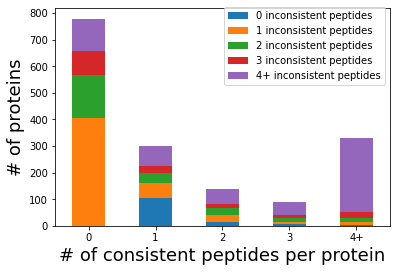

In [23]:
plotdf = plotdf.reset_index()

melted = pd.melt(plotdf, id_vars='index', value_vars=plotdf.columns.tolist())
melted.rename({'variable':'category', 'index':'total_peptides', 'value':'num_proteins'}, axis=1, inplace=True)
melted = melted[melted['num_proteins'].notnull()]
melted.head()

# make a boxplot
#each row is a protein
#y axis is the number of inconsistent
#x axis is the category

plot4 = melted.copy()
plot4



def get_inconsistent_count(row):
    num_consistent = int(row['category'].split(' ')[0])        
    num_total = row['total_peptides']
    if num_consistent == num_total:
        return 0
    else:
        num_inconsistent  = num_total - num_consistent
        return num_inconsistent
    
plot4 = melted.copy()
plot4['inconsistent_count'] = plot4.apply(get_inconsistent_count, axis=1)
plot4 = plot4.sort_values('category')
plot4.replace('4 consistent peptide', '4+ consistent peptide', inplace=True)
plot4.replace('4', '4+', inplace=True)


plot4.drop(columns='total_peptides', inplace=True)

plot4 = plot4.groupby(['category', 'inconsistent_count'])['num_proteins'].sum().unstack().fillna(0)

#format to deal with 4+
above4 = list(plot4.columns)
above4 = [x for x in above4 if x >= 4]
plot4['4+'] = plot4[above4].sum(axis=1)
plot4.drop(columns=above4, axis=1,inplace=True)

plot4 = plot4.rename({0:'0 inconsistent peptides',
             1:'1 inconsistent peptides',
             2:'2 inconsistent peptides',
             3:'3 inconsistent peptides',
             '4+':'4+ inconsistent peptides'}, axis=1)
plot4


from matplotlib import pyplot as plt

# Very simple one-liner using our agg_tips DataFrame.
ax = plot4.plot(kind='bar', stacked=True)

plt.xticks(rotation=0, ha='center')

ax.legend(bbox_to_anchor=(1., 1.03))

plt.xlabel('# of consistent peptides per protein', fontsize=18)
plt.ylabel('# of proteins', fontsize=18)
plt.savefig('stacked_bar_chart.png', dpi=600, bbox_inches = "tight")

plt.show()

In [24]:
plotdf.sum()

index    3022.0
0         779.0
1         302.0
2         137.0
3          89.0
4         329.0
dtype: float64

In [25]:
num_prot = len(list(df_gene_ind.index.get_level_values('Gene Names').unique()))

In [26]:
num_prot

1636

In [27]:
print('0 consistent: ' + str(round(229/num_prot*100, 2)))
print('1 consistent: ' + str(round(241/num_prot*100, 2)))
print('2 consistent: ' + str(round(79/num_prot*100,2)))
print('3 consistent: ' + str(round(31/num_prot*100,2)))
print('4+ consistent: ' + str(round(45/num_prot*100,2)))

0 consistent: 14.0
1 consistent: 14.73
2 consistent: 4.83
3 consistent: 1.89
4+ consistent: 2.75
